In [1]:
#https://www.kaggle.com/enzus01/two-style-of-blending-and-double-blend-03d58b/notebook?scriptVersionId=9116365
import numpy as np
import pandas as pd
import os

from scipy.stats import rankdata

# DATA VIZUALIZATION LIBRARIES
from matplotlib import pyplot as plt
import seaborn as sns

# METRICS TO MEASURE RMSE
from math import sqrt
from sklearn import metrics
LABELS = ["HasDetections"]

In [2]:
!ls

blender.ipynb         super_blend.csv       v2_extrem.csv
submitVersion2_11.csv v1.csv
submitv1.csv          v1_extrem.csv


In [3]:
#ALL PUBLIC SOLUTION RMSE < 0.2269 (WITHOUT REPETITIONS)
#df_base0 = pd.read_csv("submitv1.csv",names=["MachineIdentifier","HasDetections0"], skiprows=[0],header=None)
df_base0 = pd.read_csv("super_blend.csv",names=["MachineIdentifier","HasDetections1"], skiprows=[0],header=None)
df_base1 = pd.read_csv("submitVersion2_11.csv",names=["MachineIdentifier","HasDetections2"], skiprows=[0],header=None)
#df_base2 = pd.read_csv("submitVersion2_11.csv",names=["MachineIdentifier","HasDetections2"], skiprows=[0],header=None)

#df_base3 = pd.read_csv("../input/outputs-for-microsoft/submission_ashish_kfold.csv",names=["MachineIdentifier","HasDetections3"], skiprows=[0],header=None)

In [4]:
df_base = pd.merge(df_base0,df_base1,how='inner',on='MachineIdentifier')
#df_base = pd.merge(df_base,df_base2,how='inner',on='MachineIdentifier')
#df_base = pd.merge(df_base,df_base3,how='inner',on='MachineIdentifier')
#df_base = pd.merge(df_base,df_base4,how='inner',on='MachineIdentifier')

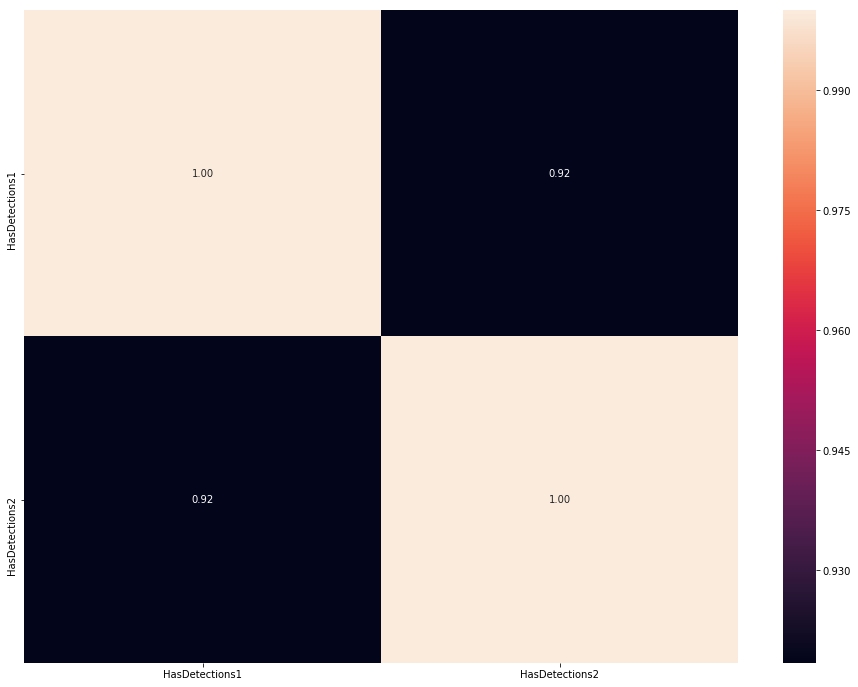

In [5]:
plt.figure(figsize=(16,12))
sns.heatmap(df_base.iloc[:,1:].corr(),annot=True,fmt=".2f")

In [6]:
#SOLUTION = MEAN OF COLUMNS
df_base['HasDetections'] = df_base.iloc[:,1:].mean(axis=1)
#df_base[['MachineIdentifier','HasDetections']].to_csv("v1.csv",index=False)

In [7]:
df_base[['MachineIdentifier','HasDetections']].to_csv("v2_extrem.csv",index=False)

In [9]:
df_base.head()

,MachineIdentifier,HasDetections1,HasDetections2,HasDetections
0,0000010489e3af074adeac69c53e555e,0.653710,0.527277,0.590493
1,00000176ac758d54827acd545b6315a5,0.773682,0.502640,0.638161
2,0000019dcefc128c2d4387c1273dae1d,0.602568,0.513146,0.557857
3,0000055553dc51b1295785415f1a224d,0.348668,0.351992,0.350330
4,00000574cefffeca83ec8adf9285b2bf,0.570125,0.454639,0.512382


In [10]:
def cleaner(row):
    if row['HasDetections'] > 0.8:
        return 1.
    elif row['HasDetections'] < 0.2:
        return 0
    else:
        return row['HasDetections']
    
df_base['HasDetections']=df_base.apply(lambda row: cleaner(row), axis=1)

In [18]:
df_base.head()

,MachineIdentifier,HasDetections0,HasDetections1,HasDetections
0,0000010489e3af074adeac69c53e555e,0.584731,0.653710,0.619221
1,00000176ac758d54827acd545b6315a5,0.481521,0.773682,0.627601
2,0000019dcefc128c2d4387c1273dae1d,0.569668,0.602568,0.586118
3,0000055553dc51b1295785415f1a224d,0.362998,0.348668,0.355833
4,00000574cefffeca83ec8adf9285b2bf,0.418348,0.570125,0.494236


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21f5f860>,
      dtype=object)

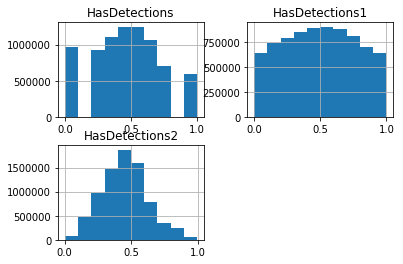

In [11]:
df_base.hist()

In [7]:
df_base.describe()

,HasDetections0,HasDetections1,HasDetections2
count,7.853253e+06,7.853253e+06,7.853253e+06
mean,4.364812e-01,5.000001e-01,4.507803e-01
std,1.687339e-01,2.726516e-01,1.702056e-01
min,1.130194e-03,5.942336e-07,6.797791e-04
25%,3.215939e-01,2.740076e-01,3.331684e-01
50%,4.306175e-01,5.013928e-01,4.487227e-01
75%,5.346992e-01,7.234052e-01,5.566242e-01
max,9.936924e-01,9.999974e-01,9.932907e-01


In [22]:
delta=0.5-df_base.HasDetections.mean()

In [23]:
delta

0.03961743302083376